2. For a given dataset predict number of bikes getting shared based on
temperature of the day

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset=pd.read_csv("bike_sharing.csv")

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dataset.shape

(17379, 17)

In [5]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Data preprocessing

### Checking for null values

In [7]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking for duplicates

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset=dataset.loc[:,['atemp','cnt']]
dataset.head()

,atemp,cnt
0,0.2879,16
1,0.2727,40
2,0.2727,32
3,0.2879,13
4,0.2879,1


In [10]:
dataset.shape

(17379, 2)

### Checking for outlier

<AxesSubplot:>

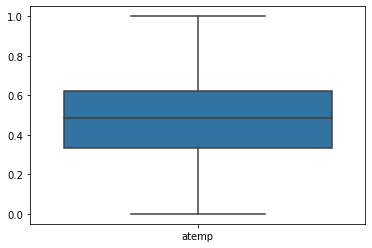

In [11]:
sns.boxplot(data=dataset[['atemp']])

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_x=StandardScaler()
dataset=sc_x.fit_transform(dataset)

In [14]:
x=dataset[:,:-1]
y=dataset[:,-1]

In [15]:
x.shape

(17379, 1)

In [16]:
y.shape

(17379,)

## Data train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13903, 1), (3476, 1), (13903,), (3476,))

## Model building

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_train_pred=lr.predict(x_train)

In [24]:
R2_score=r2_score(y_train,y_train_pred)
R2_score

0.15919480789457074

In [25]:
y_test_pred=lr.predict(x_test)

In [26]:
R2_score=r2_score(y_test,y_test_pred)
R2_score

0.16672968326666582

In [27]:
Mean_Squared_Error=mean_squared_error(y_test,y_test_pred)
Mean_Squared_Error

0.8451626335328314

# 